# BCA Protein Assay : Regression Analysis and Sample [Protein] Calculation
23rd of August 2024

This script guides you through the process of analyzing data from a BCA Protein Assay, including loading the data, selecting relevant samples, performing regression analysis, and calculating sample protein concentrations.
___


<h3> <b> Step 1:</b> Loading Absorbance Data from and Excel file </h3>

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

sns.set_style('darkgrid')

# Loads dataframe from specified xlsx file 
# This file should contain the absorbance readings from the 96-well plate

df_file = input('State the file name of your Excel file. Include the format, e.g. "Excel_file_name.xlsx": ')

try:
    df = pd.read_excel(df_file)
    print('Loading in dataframe ...')

except Exception as e:
        # Provides detailed error code for troubleshooting
        print(f'An error occured: {e}. Remember to add the file format at the end!')

df

Loading in dataframe...


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Software Version,2.00.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Plate Number,Plate 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Date,2022-11-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Time,13:36:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Reader Type:,Epoch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Reader Serial Number:,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Reading Type,Reader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Procedure Details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
table = df.tail(8)

table

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
20,NaN,A,0.047,0.047,0.080,0.081,0.088,0.154,0.147,0.046,0.047,0.047,0.045,0.047,562.0
21,NaN,B,0.047,0.047,0.116,0.118,0.112,0.164,0.152,0.047,0.046,0.046,0.047,0.047,562.0
22,NaN,C,0.047,0.047,0.144,0.145,0.144,0.157,0.144,0.047,0.047,0.047,0.046,0.048,562.0
23,NaN,D,0.047,0.047,0.196,0.202,0.195,0.154,0.047,0.046,0.047,0.047,0.046,0.048,562.0
24,NaN,E,0.046,0.047,0.239,0.237,0.241,0.047,0.046,0.048,0.049,0.047,0.048,0.048,562.0
25,NaN,F,0.047,0.045,0.316,0.334,0.343,0.047,0.049,0.048,0.047,0.047,0.048,0.047,562.0
26,NaN,G,0.046,0.047,0.545,0.552,0.558,0.046,0.046,0.047,0.052,0.046,0.047,0.048,562.0
27,NaN,H,0.046,0.048,0.048,0.046,0.045,0.048,0.047,0.045,0.046,0.046,0.050,0.046,562.0


<h3> <b> Step 2:</b> Extracting Relevant Absorbance Data </h3>

In this step, we select the relevant columns that contain absorbance data from the 96-well plate. This data is crucial for plotting the standard curve and determining sample concentrations.

In [248]:
columns = []

for x in table.columns:
    columns.append(x)

columns_to_select = columns[1:14]

data = table[columns_to_select].set_index(columns_to_select[0], drop=True)

# Renames columns to int 1-12
data.columns = [x for x in range(1,13)]
data.rename_axis('', inplace=True)

print('Extracting table ...')

data

Extracting table ...


,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,0.047,0.047,0.080,0.081,0.088,0.154,0.147,0.046,0.047,0.047,0.045,0.047
B,0.047,0.047,0.116,0.118,0.112,0.164,0.152,0.047,0.046,0.046,0.047,0.047
C,0.047,0.047,0.144,0.145,0.144,0.157,0.144,0.047,0.047,0.047,0.046,0.048
D,0.047,0.047,0.196,0.202,0.195,0.154,0.047,0.046,0.047,0.047,0.046,0.048
E,0.046,0.047,0.239,0.237,0.241,0.047,0.046,0.048,0.049,0.047,0.048,0.048
F,0.047,0.045,0.316,0.334,0.343,0.047,0.049,0.048,0.047,0.047,0.048,0.047
G,0.046,0.047,0.545,0.552,0.558,0.046,0.046,0.047,0.052,0.046,0.047,0.048
H,0.046,0.048,0.048,0.046,0.045,0.048,0.047,0.045,0.046,0.046,0.050,0.046


<h3> <b> Step 3:</b> Visualizing Data Distribution with a Boxplot </h3>

In [225]:
def StandardCurve(data):
    
    """
    Generates a standard curve by processing the absorbance data from the 96-well plate.
    
    The function plots a boxplot to visualize the distribution of the quantitative data.
    It also calculates the mean absorbance for the standard concentrations based on the user input.
        
    Returns:
        tuple: 
            - standard_conc (list of float): List of standard concentrations provided by the user.
            - standard_units (list of str): List containing the unit of measurement for the standard concentrations.
            - standard_values_location (list of str/int): List of columns or rows where the standard values are located.
            - new_data (pandas.Series): Series containing the mean absorbance values for the standard concentrations.
    
    Raises:
        Exception: If any error occurs during the data processing, it will be caught and the function will return None for all outputs.
    """
    
    try:                                                      
        
        plt.figure(figsize=(5,3))
        
        # Get standard concentrations from user input
        standard_conc = [float(x.strip()) for x in input(
            'Which standard concentrations did you load? \nList concentrations separated with a comma (use "." for decimals, not ","), such as: "0, 0.25, 0.5, 1, 1.5, 2.5, 5": ').split(',')]
        
        # Get protein concentration units from user input
        standard_units = input('Which unit did you use for the standard concentrations? (List as "mg/mL"): ').split('/')

        # Get standard values location from user input
        standard_values_location = [x.strip() for x in input(
            'Which columns hold the standard values? List all columns (replicate 1, replicate 2, replicate 3) like "3,4,5" if vertically loaded or "C,D,E" (capitalised!) if horizontal: ').split(',')]
        
        if standard_values_location is not None:
            
            # Check if samples were loaded vertically; column indices are numeric
            # This approach is used because the data format can vary based on how the samples were pipetted into the 96 well
            if standard_values_location[0].isdigit():
                print('Detected vertical orientation when loading of samples.')
                
                # Plots an overview of the dataset, making it easy to explain outliers
                sns.boxplot(data=data[0:len(standard_conc)], palette='BuPu')
                sns.despine()
                
                # Convert the standard values location to integers for column selection
                standard_values_location = [int(x) for x in standard_values_location]

                # Calculate the mean absorbance for each concentration
                new_data = data[standard_values_location].mean(axis=1)[0:(len(standard_conc))]
            
            # Check if samples were pipetted horizontally; row indices are alphabetic
            elif standard_values_location[0].isalpha():
                print('Detected horizontal orientation when loading of samples.')
                
                # Flips the data for easier horizontal processing
                transposed_data = data.transpose()

                # Visualizes the transposed data
                sns.boxplot(data=transposed_data[0:len(standard_conc)], palette='BuPu')
                sns.despine()

                # Calculate the mean absorbance for each concentration
                standard_values_location = [x.upper() for x in standard_values_location]
                new_data = transposed_data[standard_values_location].mean(axis=1)[0:(len(standard_conc))]

            else:
                # Handle unexpected input
                print('Column/row of data could not be detected.')
                new_data = None
        
        else:
            print('Standard values data is missing.')
            new_data = None
        
        # Simple boxplot formatting
        plt.title('Data overview', fontdict= {'fontsize' : 14, 'fontweight' : 'semibold'})
        plt.xlabel('columns')
        
        return standard_conc, standard_units, standard_values_location, new_data
    
    except Exception as e:
        # Returns None and provides detailed error code for troubleshooting
        print(f'An error occured: {e}')
        return None, None, None, None

<h3> <b> Step 4:</b> Calculating the Standard Curve Equation and the Coefficient of Determination (R<sup>2</sup> value) </h3>

**Note:** Ensure that the standard concentrations are entered correctly, as they will be used to calculate the regression line.


Detected vertical orientation when loading of samples.
The equation of the standard curve is:
y = 0.092x + 0.096


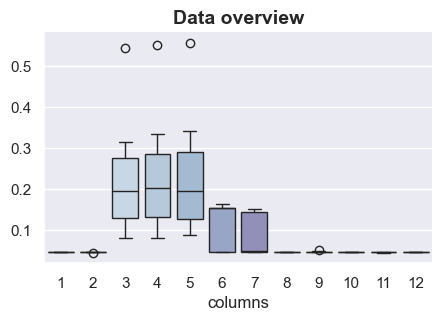

In [226]:
# Access the returned function variables as a tuple
standard_conc, standard_units, standard_values_location, new_data = StandardCurve(data)

X = np.array(standard_conc).reshape(-1, 1)

y = np.array(new_data.round(4))

model = LinearRegression()

model.fit(X, y)

# Calculating the coefficient of determination
r_squared = model.score(X, y)

# Obtaining the coefficients
slope = model.coef_[0] # a
intercept = model.intercept_ # b
print(f'The equation of the standard curve is:\ny = {slope:.3f}x + {intercept:.3f}')

<h3> <b> Step 5:</b> Plotting the Standard Curve </h3>

The plot is saved at 300 DPI, ensuring high-quality output suitable for publications.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Standard curve plot, plotted using the data from columns 3 4 5 and rows A B C D E F G .


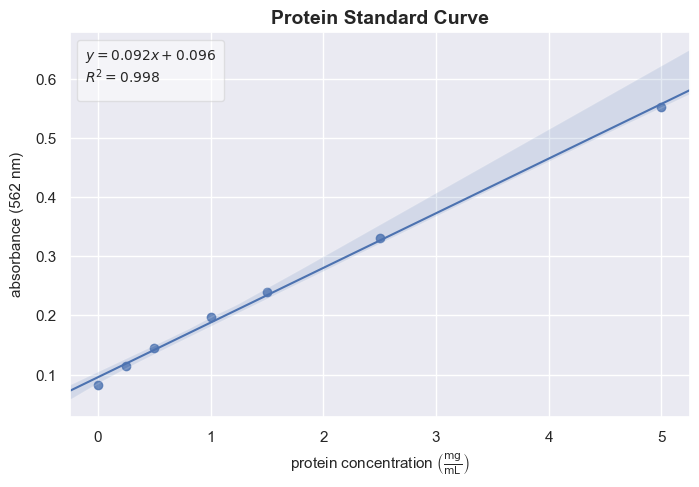

In [239]:
""" PLOTTING THE STANDARD CURVE """

sns.set_theme(style='darkgrid')

plt.figure(figsize=(8,5), dpi=100)

# Ensure new_data is not None before plotting
if new_data is not None:
    
    print('Standard curve plot, plotted using the data from columns', *standard_values_location, 'and rows', *(new_data.index[:len(standard_conc)]),'.')
    
    sns.regplot(x = standard_conc, 
            y = new_data, 
            color='b', 
            truncate=False, 
            order=1, 
            # line_kws allows for additional plt.plot standard line parameters to be added to the line plot specifically
            line_kws={'linewidth' : 1.5})
    
    plt.title('Protein Standard Curve',
              loc='center',
              fontdict= {'fontsize' : 14, 
                        'fontweight' : 'semibold'})

    # Adding the line equation and coefficient of determination to the plot
    plt.legend(title=(fr'$y = {slope:.3f}x + {intercept:.3f}$'+'\n'+ fr'$R^{{2}}= {r_squared:.3f}$'), 
               loc='upper left', 
               title_fontsize='small', 
               facecolor='white', 
               framealpha=0.5,
               borderpad=0.5)

    # Here you can edit the absorbance value (562 nm)
    plt.ylabel('absorbance (562 nm)', 
            loc='center', 
            labelpad=8, 
            fontdict= {'fontsize' : 11})
    
    plt.xticks([x for x in range(0,len(standard_conc)-1,1)])

    # Adding LaTeX formatting to the axis title ($\frac{numerator}{denominator}$), then removing the italic formatting using \text{}
    plt.xlabel(fr'protein concentration $ \left( \frac{{\text{{{standard_units[0]}}}}}{{\text{{{standard_units[1]}}}}} \right) $',
            loc='center', 
            labelpad=5, 
            fontdict= {'fontsize' : 11});

    # Saves the plot to a file, with DPI=300 ensuring publication-quality resolution
    plt.savefig('standard_curve.png', format='png', dpi=300, bbox_inches='tight')

else:
    print('No data available for plotting.')

<h3> <b> Step 6:</b> Calculating Protein Concentration in Unknown Samples </h3>

This step calculates the protein concentration of your unknown samples from the standard line equation.

In [242]:
# Calculates sample concentration based on absorbance values
def CalcConc(absorbance):

    """
    Calculates the protein concentration based on absorbance values using the 
    standard line equation derived from the regression analysis.

    Returns:
    float: The calculated protein concentration.
    """

    return ((absorbance-intercept)/slope)

# User confirms straight-line pipetting, now asking for the sample locations
location_check = input('Were your samples pipetted in a straight line, starting at positions A(1-12) or (A-H)1? (answer with yes/no): ').strip()

if location_check.lower() == 'yes':

    sample_location = input('In which column did you load your sample(s)? (if multiple, separate column values with "," like "3, 4" or "A, B"): ').split(',')

    for sample in sample_location:
        sample.strip()
        
        if sample == '':
            continue # Skips if an empty input was included (e.g."3,4,5,")

        elif sample[0].isdigit():
            # Sample location is given as a number, indicating vertical loading
            sample_abs = data[int(sample)].iloc[:3].mean()

        elif sample[0].isalpha():
            # Sample location is given as a letter, indicating horizontal loading
            sample = sample.upper()
            transposed_data = data.transpose()
            sample_abs = transposed_data[sample].iloc[:3].mean()
        
        else:
            # Handle invalid input formats
            print('No valid sample data accessible.')
            continue
        
        # Calculate and print concentration for the sample(s)
        concentration = CalcConc(sample_abs)
        print(f'The concentrations of the sample located in column {sample} is: {concentration:.3f} {standard_units[0]}/{standard_units[1]}')
else:
    # Handle cases where samples were not loaded in a straight line
    print('The protein concentration in your samples will be calculated using the line equation of the standard curve.')
    
    # This allows calculation of [protein] when an average of the samples is given, calculated from the standard line equation
    count_samples = int(input('How many samples with unknown concentration did you want to calculate the protein concentration of? (input a number, for instance "2"): '))
    
    if isinstance(count_samples, int) and count_samples > 0:
        print(f'Calculating protein concentration for {count_samples} samples.')
        
        count = 0 # Counts the number of samples to use for calculation of protein concentration
        for sample_number in range(0, count_samples):
            count += 1
            sample_absorbance = float(input(f' What is the mean absorbance for sample {count} ? (Input the mean with decimals as such "0.367"): '))
            print(f'The concentration in sample {count} with a mean absorbance of {sample_absorbance} is: {CalcConc(sample_absorbance):.3f} {standard_units[0]}/{standard_units[1]}')
    else:
        # Handle invalid or missing sample count
        print('Sample absorbance was not input in the correct format as a number. Remember to give the input in this format: "4"')

The concentrations of the sample located in column 6 is: 0.679 mg/mL
The concentrations of the sample located in column 7 is: 0.564 mg/mL
